In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('Agriculture_Manual_Daily_Labour_Wage_In_India_2010_2019.csv')

In [75]:
df.head()

,Centre,Gender,Labour Category,Labour Type,State,District,Wage(INR),Month,Year
0,BUKKAPATINAM,M,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,216.0,Jul,2015
1,BUKKAPATINAM,W,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,150.0,Jul,2015
2,BUKKAPATINAM,M,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
3,BUKKAPATINAM,W,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
4,BUKKAPATINAM,M,SKILLED \nLABOUR,CARPENTER,ANDHRA PRADESH,ANANTAPUR,300.0,Jul,2015


In [ ]:
df.drop()

In [55]:
df.to_csv('smol1.csv')

In [56]:
df

,Centre,Gender,Labour Category,Labour Type,State,District,Wage(INR),Month,Year
0,BUKKAPATINAM,M,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,216.0,Jul,2015
1,BUKKAPATINAM,W,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,150.0,Jul,2015
2,BUKKAPATINAM,M,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
3,BUKKAPATINAM,W,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
4,BUKKAPATINAM,M,SKILLED \nLABOUR,CARPENTER,ANDHRA PRADESH,ANANTAPUR,300.0,Jul,2015
...,...,...,...,...,...,...,...,...,...
99995,CHANDANPUR,W,FIELD LABOUR,SOWER,BIHAR,LAKHISARAI,NaN,Feb,2012
99996,CHANDANPUR,M,OTHER \nAGRICULTURAL \nLABOUR,OTHER \nAGRICULTURAL \nLABOUR,BIHAR,LAKHISARAI,NaN,Feb,2012
99997,CHANDANPUR,W,OTHER \nAGRICULTURAL \nLABOUR,OTHER \nAGRICULTURAL \nLABOUR,BIHAR,LAKHISARAI,NaN,Feb,2012
99998,CHANDANPUR,M,SKILLED \nLABOUR,CARPENTER,BIHAR,LAKHISARAI,NaN,Feb,2012


In [76]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}  # Dictionary to store LabelEncoder objects
label_mappings = {}  # Dictionary to store mappings

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the LabelEncoder
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Drop rows with missing 'Wage(INR)' values
data_encoded = df.dropna(subset=['Wage(INR)'])



In [79]:
print(label_mappings)

{'Centre': {'1DBL-A': 0, '24-PARGANAS(N)': 1, '24-PARGANAS(S)': 2, '2F': 3, '8GGR': 4, '9TK': 5, 'AADAR': 6, 'AARAE': 7, 'ABHANA': 8, 'ABHANPUR': 9, 'ADHANA': 10, 'AGRA': 11, 'AHMEDNAGAR': 12, 'AJANA': 13, 'AKHALAKHPUR': 14, 'AKOLA': 15, 'ALAMKODU': 16, 'ALANANKUDA': 17, 'ALIGARH': 18, 'ALIPURDUAR': 19, 'ALLAHABAD': 20, 'AMANU': 21, 'AMARAVATHI': 22, 'AMARNABHA': 23, 'AMARPUR': 24, 'AMBA': 25, 'AMBAGARH \nCHAUKI': 26, 'AMBAH': 27, 'AMBAJIPETA': 28, 'AMBEDKARNAGAR': 29, 'AMBUHAH': 30, 'AMETHI': 31, 'AMI': 32, 'AMILIYA': 33, 'AMIRGADH': 34, 'AMKHOLI': 35, 'AMLI': 36, 'AMRELI': 37, 'ANADRA': 38, 'ANAND': 39, 'ANANDPUR': 40, 'ANANTHARAM': 41, 'ANEGERE(KADUR \nTq)': 42, 'ANGUL': 43, 'ANGWALI': 44, 'ANI': 45, 'ANUPPUR': 46, 'ARAMBHA': 47, 'ARIAPURA\n(THIRTHAHALLI Tq)': 48, 'ARMNABHA': 49, 'ARUTLA': 50, 'ARUVIKKARAI': 51, 'ARVALLI': 52, 'ARYAPALAYAM': 53, 'ASKA': 54, 'ASNAWAR': 55, 'ATHAGARH': 56, 'ATHAMALIK': 57, 'ATHIYOOTHU': 58, 'ATMAKUR': 59, 'ATMALPUR \nBAUNGALA': 60, 'ATPARA': 61, 'AUGU

In [86]:
# Convert the mappings dictionary to a DataFrame for nicer display
mapping_list = []

# Iterate over each column's mapping in the dictionary
for column, mapping in label_mappings.items():
    for original, encoded in mapping.items():
        mapping_list.append({'Column': column, 'Original Label': original, 'Encoded Value': encoded})

# Convert the list to a DataFrame for a comprehensive view
mapping_df = pd.DataFrame(mapping_list)

# Show the DataFrame
print(mapping_df)


      Column  Original Label  Encoded Value
0     Centre          1DBL-A              0
1     Centre  24-PARGANAS(N)              1
2     Centre  24-PARGANAS(S)              2
3     Centre              2F              3
4     Centre            8GGR              4
...      ...             ...            ...
1565   Month             Mar              7
1566   Month             May              8
1567   Month             Nov              9
1568   Month             Oct             10
1569   Month             Sep             11

[1570 rows x 3 columns]


In [87]:
mapping_df.to_csv('map.csv')

,Centre,Gender,Labour Category,Labour Type,State,District,Month
1DBL-A,0.0,NaN,NaN,NaN,NaN,NaN,NaN
24-PARGANAS(N),1.0,NaN,NaN,NaN,NaN,0.0,NaN
24-PARGANAS(S),2.0,NaN,NaN,NaN,NaN,1.0,NaN
2F,3.0,NaN,NaN,NaN,NaN,NaN,NaN
8GGR,4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Mar,NaN,NaN,NaN,NaN,NaN,NaN,7.0
May,NaN,NaN,NaN,NaN,NaN,NaN,8.0
Nov,NaN,NaN,NaN,NaN,NaN,NaN,9.0
Oct,NaN,NaN,NaN,NaN,NaN,NaN,10.0


In [58]:
data_encoded.head()

,Centre,Gender,Labour Category,Labour Type,State,District,Wage(INR),Month,Year
0,96,0,0,3,0,15,216.0,5,2015
1,96,1,0,3,0,15,150.0,5,2015
2,96,0,1,4,0,15,200.0,5,2015
3,96,1,1,4,0,15,200.0,5,2015
4,96,0,3,1,0,15,300.0,5,2015


In [59]:
cleaned_data = df.dropna(subset=['Wage(INR)'])
cluster_data = cleaned_data[['Gender', 'Wage(INR)']]
cluster_data.head()

,Gender,Wage(INR)
0,0,216.0
1,1,150.0
2,0,200.0
3,1,200.0
4,0,300.0


In [60]:
k_values_encoded_all = range(1, 11)
ssd_encoded_all = []

for k in k_values_encoded_all:
    kmeans_encoded_all = KMeans(n_clusters=k, random_state=0)
    kmeans_encoded_all.fit(cluster_data)
    ssd_encoded_all.append(kmeans_encoded_all.inertia_)

c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

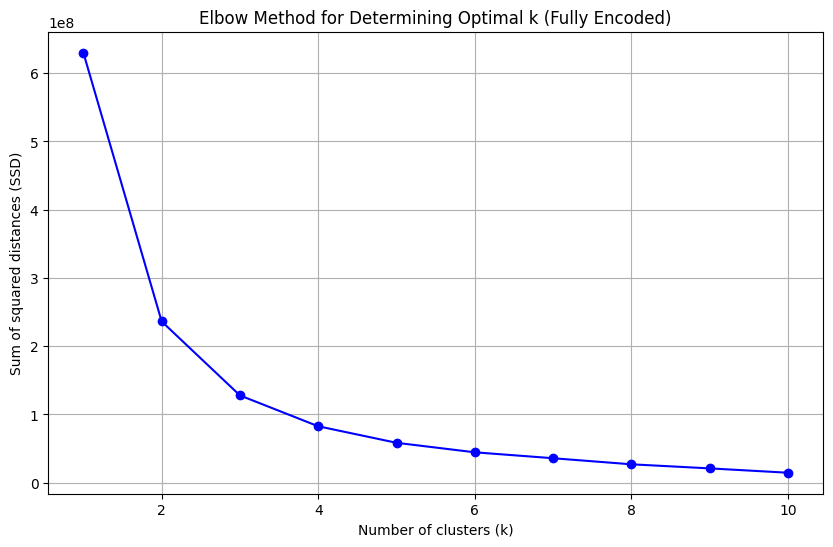

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(k_values_encoded_all, ssd_encoded_all, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method for Determining Optimal k (Fully Encoded)')
plt.grid(True)
plt.show()

In [97]:
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model on the data
kmeans.fit(cluster_data)

c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [98]:
cluster_data['Cluster'] = kmeans.labels_

# Calculate the average wage for each cluster
cluster_info = cluster_data.groupby('Cluster')['Wage(INR)'].mean().reset_index()
cluster_info.rename(columns={'Wage(INR)': 'Average Wage'}, inplace=True)

# Calculate the proportion of genders within each cluster
gender_counts = cluster_data.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)
gender_counts.columns = ['Male Count', 'Female Count']
gender_counts['Total Count'] = gender_counts.sum(axis=1)
gender_counts['Male Proportion'] = (gender_counts['Male Count'] / gender_counts['Total Count']) * 100
gender_counts['Female Proportion'] = (gender_counts['Female Count'] / gender_counts['Total Count']) * 100

# Combine average wage info with gender proportions
cluster_info = pd.merge(cluster_info, gender_counts, on='Cluster')

cluster_info[['Cluster', 'Average Wage', 'Male Count', 'Female Count', 'Male Proportion', 'Female Proportion', 'Total Count']]

C:\Users\anees\AppData\Local\Temp\ipykernel_12424\1664016712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = kmeans.labels_


,Cluster,Average Wage,Male Count,Female Count,Male Proportion,Female Proportion,Total Count
0,0,125.744935,9291,8256,52.949222,47.050778,17547
1,1,218.325680,11652,4414,72.525831,27.474169,16066
2,2,534.069239,2386,202,92.194745,7.805255,2588
3,3,334.945256,9034,1446,86.202290,13.797710,10480


In [96]:
labour_wage_data = df[['Labour Category', 'Wage(INR)']].dropna()

# Using K-means with k=4, a reasonable assumption based on previous analyses
kmeans_labour_wage = KMeans(n_clusters=4, random_state=0)
kmeans_labour_wage.fit(labour_wage_data)

# Add cluster labels to the data
labour_wage_data['Cluster'] = kmeans_labour_wage.labels_

# Calculate the average wage for each cluster
cluster_labour_info = labour_wage_data.groupby('Cluster')['Wage(INR)'].mean().reset_index()
cluster_labour_info.rename(columns={'Wage(INR)': 'Average Wage'}, inplace=True)

# Calculate the distribution of labour categories within each cluster
labour_category_counts = labour_wage_data.groupby(['Cluster', 'Labour Category']).size().unstack(fill_value=0)
labour_category_proportions = labour_category_counts.div(labour_category_counts.sum(axis=1), axis=0) * 100

# Combine average wage info with labour category proportions
cluster_labour_info = pd.merge(cluster_labour_info, labour_category_counts, left_on='Cluster', right_index=True)
#cluster_labour_info = pd.merge(cluster_labour_info, labour_category_proportions, left_on='Cluster', right_index=True, suffixes=('_Count', '_Proportion'))

cluster_labour_info

c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster,Average Wage,0,1,2,3
0,0,223.500558,54377,10584,18827,16719
1,1,534.784007,6983,264,2422,14218
2,2,128.102349,47672,12895,17382,8092
3,3,339.530292,32774,4257,12775,28473


In [90]:
state_wage_data = df[['State', 'Wage(INR)']].dropna()

# Using K-means with k=4, a reasonable assumption based on previous analyses
kmeans_state_wage = KMeans(n_clusters=4, random_state=0)
kmeans_state_wage.fit(state_wage_data)

# Add cluster labels to the data
state_wage_data['Cluster'] = kmeans_state_wage.labels_

# Calculate the average wage for each cluster
cluster_state_info = state_wage_data.groupby('Cluster')['Wage(INR)'].mean().reset_index()
cluster_state_info.rename(columns={'Wage(INR)': 'Average Wage'}, inplace=True)

# Calculate the distribution of states within each cluster
state_counts = state_wage_data.groupby(['Cluster', 'State']).size().unstack(fill_value=0)
state_proportions = state_counts.div(state_counts.sum(axis=1), axis=0) * 100

# Combine average wage info with state proportions
cluster_state_info = pd.merge(cluster_state_info, state_counts, left_on='Cluster', right_index=True)
#cluster_state_info = pd.merge(cluster_state_info, left_on='Cluster', right_index=True, suffixes=('_Count', '_Proportion'))



c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [95]:
# Assuming 'le_state' is the LabelEncoder instance used for the 'State' column
sorted_cluster_info = cluster_state_info.sort_values(by='Average Wage')

# If you want it in descending order (from highest to lowest wage), you can add ascending=False
sorted_cluster_info_descending = cluster_state_info.sort_values(by='Average Wage', ascending=False)

# Display the sorted DataFrame
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(sorted_cluster_info)

   Cluster  Average Wage     0     1     2     3      4     5     6     7  \
2        2    128.102349  3296  2257  5262  9433  12180   354  3520  2747   
0        0    223.500558  3057  3885  6677  4830   8251  3002  3823  2048   
3        3    339.530292  2725  1719  3507  2751   2603  8770  3941  2514   
1        1    534.784007   415    56   722   198    744  3076   641   350   

      8     9     10    11     12    13    14    15    16    17   18     19  \
2  1585   868  12799  3011   3710  6829     0  3106  7111   508  790   2170   
0  1945  1768  10950  1013  16301   778  2366  5975  3508  1983  877  11720   
3  2470  2398   7744   211  10012    34  5540  6665  3430  2435  391   3967   
1   218  5263   1035     0   1702     0  2354  3563   820   429    4    976   

     20    21  
2  1508  2997  
0  1332  4418  
3  2536  1916  
1  1095   226  
